In [1]:
# First, let's import the necessary libraries
import numpy as np
import networkx as nx
from scipy.spatial import Voronoi, Delaunay
from scipy.spatial.distance import euclidean

# Generate random 2D points for demonstration
np.random.seed(0)
points = np.random.rand(50, 2)

# Add specific points for "cat" and "dog"
points = np.vstack([points, np.array([[0.1, 0.1], [0.9, 0.9]])])

# Generate Voronoi tessellation
vor = Voronoi(points)

# Generate Delaunay triangulation (for adjacency graph)
tri = Delaunay(points)

# Create a graph object
G = nx.Graph()

# Add edges to the graph based on Delaunay triangulation
for simplex in tri.simplices:
    for i in range(3):
        for j in range(i+1, 3):
            pt1 = tuple(points[simplex[i]])
            pt2 = tuple(points[simplex[j]])
            dist = euclidean(pt1, pt2)
            G.add_edge(pt1, pt2, weight=dist)

# Define the terms "cat" and "dog" as specific points
cat = tuple(points[-2])
dog = tuple(points[-1])

# Use Dijkstra's algorithm to find the shortest path
path = nx.shortest_path(G, source=cat, target=dog, weight='weight')

# Calculate the distance as the length of the path
voronoi_distance = len(path) - 1

# Name the path based on the cells traversed
path_name = ' -> '.join([str(pt) for pt in path])

voronoi_distance, path_name


(7,
 '(0.1, 0.1) -> (0.1965823616800535, 0.3687251706609641) -> (0.317983179393976, 0.41426299451466997) -> (0.359507900573786, 0.43703195379934145) -> (0.45615033221654855, 0.5684339488686485) -> (0.5488135039273248, 0.7151893663724195) -> (0.7781567509498505, 0.8700121482468192) -> (0.9, 0.9)')

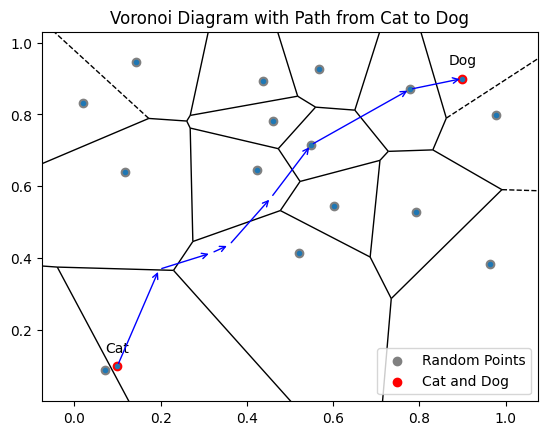

In [1]:
## Illustration of oabove code

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

# Create a random set of points for demonstration
np.random.seed(0)
points = np.random.rand(15, 2)

# Add points for 'cat' and 'dog'
points = np.vstack([points, np.array([[0.1, 0.1], [0.9, 0.9]])])

# Compute Voronoi tessellation
vor = Voronoi(points)

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False)
ax.scatter(points[:-2, 0], points[:-2, 1], c='gray', label='Random Points')
ax.scatter(points[-2:, 0], points[-2:, 1], c='red', label='Cat and Dog')

# Annotate 'cat' and 'dog'
ax.annotate('Cat', (0.1, 0.1), textcoords="offset points", xytext=(0,10), ha='center')
ax.annotate('Dog', (0.9, 0.9), textcoords="offset points", xytext=(0,10), ha='center')

# Annotate path
path_coordinates = [(0.1, 0.1), (0.1965823616800535, 0.3687251706609641), (0.317983179393976, 0.41426299451466997), (0.359507900573786, 0.43703195379934145), (0.45615033221654855, 0.5684339488686485), (0.5488135039273248, 0.7151893663724195), (0.7781567509498505, 0.8700121482468192), (0.9, 0.9)]

for i in range(len(path_coordinates) - 1):
    x1, y1 = path_coordinates[i]
    x2, y2 = path_coordinates[i + 1]
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle="->", color='blue'))

# Set title and legend
ax.set_title('Voronoi Diagram with Path from Cat to Dog')
ax.legend()

plt.show()
